# Python assignment 'estimate gradient’
**Group Members:**

Agnes Admiraal

Tim Mooren

Sicco Kooiker



In [2]:
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
a = u1, u2 = (19, 41) # A
t = v1, v2 = (86, 91) # T
s = w1, w2 = (45, 75) # S

## 1 Define your Diff function in python.

In [4]:
def dist(x, u):
    """Calculates euclidean distance between two points""" 
    x1, x2 = x
    u1, u2 = u
    return np.log(3 + 3 * (x1 - u1) ** 2 + 1.5 * (x2 - u2) ** 2)

In [5]:
def diff(x, u, v, w):
    """Calculates difference between the distances of x from u and v"""	
    return dist(u, x) + dist(v, x)+ dist(w,x)

## Check that the distance between a vector and itself is log(3). Check that the distance between your three vectors is non-zero.

In [6]:
assert (dist(a, a) == np.log(3) 
        and dist(a, t) != 0
        and dist(a, s) != 0 
        and dist(t, s) != 0)

## 2 Compute Diff(x) for 20 random points. What is the average value of Diff? What is the lowest and highest value you found? Is random search a good way to minimize this function?

In [7]:
random_points = np.random.uniform(0, 100, (20, 2))
differences = np.apply_along_axis(diff, 1, random_points, a, t, s)
differences

array([23.04113897, 25.75136644, 25.20375735, 25.35760712, 25.14165227,
       26.81071437, 26.432868  , 24.97440775, 26.9783572 , 28.02767091,
       24.86401286, 26.94916813, 24.48305109, 27.43495902, 23.72931001,
       23.77002187, 23.29484778, 27.15609235, 25.19492267, 23.94344837])

In [8]:
# calculate average value of differences
np.mean(differences)

25.42696872809622

In [9]:
# calculate lowest value of differences
np.amin(differences)

23.04113897205803

In [10]:
# calculate highest value of differences
np.amax(differences)

28.027670913486162

Random search is not a good way of finding the optimal solution. Within a range of 0 to 100, for example, there is a infinite number of possible solutions and this makes random search not applicable. Th

## 3 Set xzero=(50,50). Compute Diff(x)=Diff(50,50).


In [11]:
xzero = np.array([50, 50])
diff(xzero, a, t, s)

23.6980053183483

## 4 Create a function to compute and print the gradient of Diff by using a small delta=0.001.


In [12]:
def calc_gradient(x, u, v, w, delta=0.001):
    """Calculates gradient of the difference function at point x""" 
    old = diff(x, u, v, w)
    gradient = []
    
    for i in range(len(x)):
        x_grad = np.array(x.copy(),dtype = 'float')
        x_grad[i] += delta
        new = diff(x_grad, u, v, w)
        gradient_i = (new - old) / delta
        gradient.append(gradient_i)
                           
    return np.array(gradient)

In [13]:
calc_gradient(xzero, a, t, s)

array([ 0.05770478, -0.08405972])

## Use this function to print the gradient at (0,0), (100,0), (0,100) and (100,100). Based on these values, is it likely that the minimum of the function is inside this area? And the maximum?

In [14]:
p1 = np.array([0, 0])
p2 = np.array([100, 0])
p3 = np.array([0, 100])
p4 = np.array([100, 100])
all_points = np.array([p1, p2, p3, p4])

In [15]:
coordinates = np.apply_along_axis(calc_gradient, 1, all_points, a, t, s)
df = pd.DataFrame(coordinates, columns=['x', 'y'], index = ['(0,0)','(100,0)','(0,100)','(100,100)']).reset_index()
df

,index,x,y
0,"(0,0)",-0.065109,-0.057484
1,"(100,0)",0.047180,-0.039364
2,"(0,100)",-0.079686,0.039963
3,"(100,100)",0.170353,0.052491


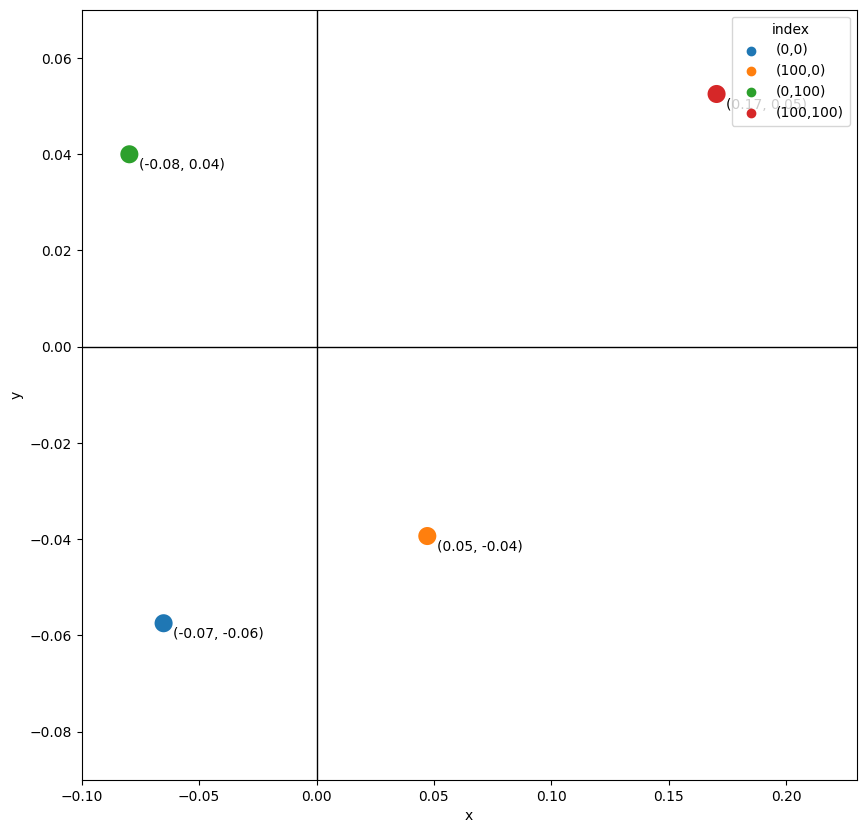

In [16]:
f = plt.figure(figsize=[10,10])
sns.scatterplot(x='x', y='y', data=df, hue='index', s =200)
for i in range(len(df)):
    x_coor = df['x'][i]
    y_coor = df['y'][i]
    plt.text( x_coor+0.004, y_coor - 0.003, f'({np.round(x_coor,2)}, {np.round(y_coor,2)})')
plt.xlim([-0.10,0.23])
plt.ylim([-0.09,0.07])
plt.hlines(0, -0.1,0.23, color= 'k',linewidth=1)
plt.vlines(0, -0.09,0.07, color='k',linewidth=1)
plt.show()

Based on the points (0,0) and (100,100) we see that both gradients are first below zero and then above zero. This shift in sign indicates there is a minimum between them. For the coordinates (100,0) and (0,100) we see that the gradient has a positive and negative value and then the signs flip when we compare both. This means there might be a saddle point between them. Since the search space is not convex, there might be many local optima whithin the space.

## 6 Define xzero=(50,50) and stepsize=1.0. Make a function to compute xnext by taking a small step into the opposite direction of the gradient, so that diff decreases. E.g. if the gradient is (0.4,0.6), do xnext=(oldx1-0.4*stepsize,oldx2-0.6*stepsize). 

In [17]:
xzero = np.array([50, 50])

In [18]:
def step(x, u, v, w, stepsize=1, ):
    """Calculates next step of gradient descent""" 
    return x - stepsize * calc_gradient(x, u, v, w)
step(xzero, a, t, s)

array([49.94229522, 50.08405972])

## 7 Repeat this multiple times (make a function to do this automatically) and print x and Diff(x) at each step. You may need to adjust stepsize if you overshoot or are not moving at all. Try to reach a local minimum.


In [143]:
def gradient_descent(x, u, v, w, delta=1, scalar=0.5, num_iteration=10000):
    """Performs gradient descent on the difference function"""
    x_new = x
    data = []
    
    for _ in range(num_iteration):
        x_old = x_new
        x_new = step(x_old, u, v, w, delta)   
        difference = diff(x_new, a, t, s)
        
        # make stepsize smaller if the new point is not better than the old point
        if difference > diff(x_old, a, t, s):        
            delta = delta * scalar
        
        gradient = calc_gradient(x_new, u, v, w)
        data.append([x_new, difference, gradient])
        
        # stop if the stepsize is too small or gradient is zero
        if delta < 0.0001 or not gradient.any():
            break	
    df = pd.DataFrame(data, columns=['location', 'difference', 'gradient'])
    return df

In [144]:
pd.set_option("display.precision", 10)
df1 = gradient_descent(xzero, a, t, s)
print(df1)

                                    location     difference  \
0    [49.94229522312139, 50.084059715973694]  23.6876046051   
1     [49.88468310501233, 50.16830160466341]  23.6771838963   
2      [49.82716640777625, 50.2527276109312]  23.6667430965   
3    [49.76974793533557, 50.337339710444695]  23.6562821065   
4     [49.71243053369108, 50.42213991034146]  23.6458008224   
..                                       ...            ...   
183   [45.00142189989971, 74.98125704000698]  17.9316400350   
184   [45.00142189989971, 74.98125704000654]  17.9316400350   
185   [45.00142189989971, 74.98125704000677]  17.9316400350   
186     [45.00142189989993, 74.981257040007]  17.9316400350   
187     [45.00142189989971, 74.981257040007]  17.9316400350   

                                             gradient  
0         [0.05761211810906275, -0.08424188868971783]  
1          [0.05751669723608188, -0.0844260062677904]  
2         [0.05741847244067344, -0.08461209951349247]  
3          [0.05731

## 8 Repeat step 7 with starting points (0,0) and (100,100). Do you always end up at the same point?

In [136]:
start1 = np.array([0, 0])
df2 =gradient_descent(start1, a, t, s)
print(df2.tail(1).location)

363    [19.031972794157248, 41.03539881674845]
Name: location, dtype: object


In [137]:
start2 = np.array([100, 100])
df3 =gradient_descent(start2, a, t, s)
print(df3.tail(1).location)

81    [85.96510417329064, 90.98191431050964]
Name: location, dtype: object


We do not always end up at the same point. The starting point (0,0) converges to (19, 41) and the starting point (100,100) converges to (86, 91). This means it is not a unimodal problem, but a multimodal one. Therefore the starting point can influence the outcome.

## 9 Make the nicest possible chart using mathplotlib that shows what the Diff function looks like.

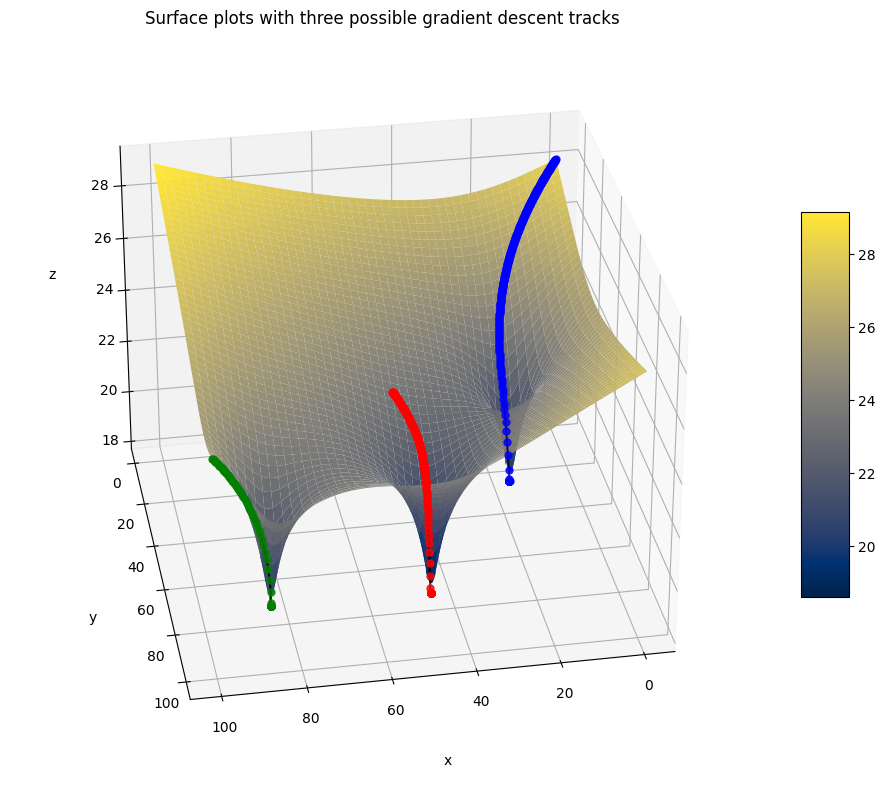

In [184]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

space = np.linspace(0, 100, 1000)

X, Y = np.meshgrid(space, space)
Z = diff((X, Y), a, t, s)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis, zorder = 2)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)



### Scatter

x_1 = np.stack(df1['location'].values)[:,0]
y_1 = np.stack(df1['location'].values)[:,1]
ax.plot(x_1,y_1,df1['difference'], color = 'k', alpha=0.8, zorder=10,markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5)

x_2 = np.stack(df2['location'].values)[:,0]
y_2 = np.stack(df2['location'].values)[:,1]
ax.plot(x_2,y_2,df2['difference'], color = 'k', alpha=0.8, zorder =10 , markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5)

x_3 = np.stack(df3['location'].values)[:,0]
y_3 = np.stack(df3['location'].values)[:,1]
ax.plot(x_3,y_3,df3['difference'], color = 'k', alpha=0.8,zorder =10, markerfacecolor='g', markeredgecolor='g', marker='o', markersize=5)



ax.view_init(30, 80)
plt.title('Surface plots with three possible gradient descent tracks')
plt.show()

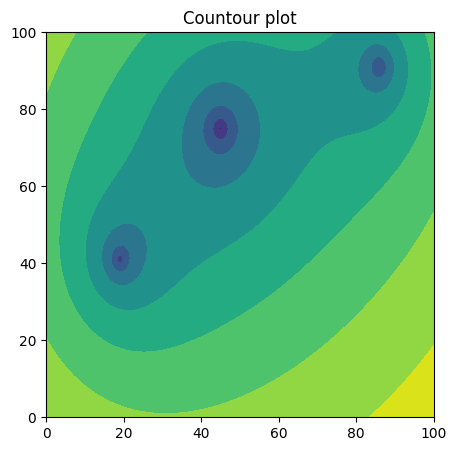

In [186]:
### contour plot
fig, ax = plt.subplots(figsize=(5,5))

cp = ax.contourf(X, Y, Z)
plt.title('Countour plot')
plt.show()

In the plot we see three local optima. These optima correspond to the ones we found beginning from the different starting positions. So we have a local minimum at the locations (85.97,90.98), (19.03, 41.04) and (45.00,74.98).

## 10 Show the gradient field as well in a chart. Use a new plot or add the gradient to the original plot.

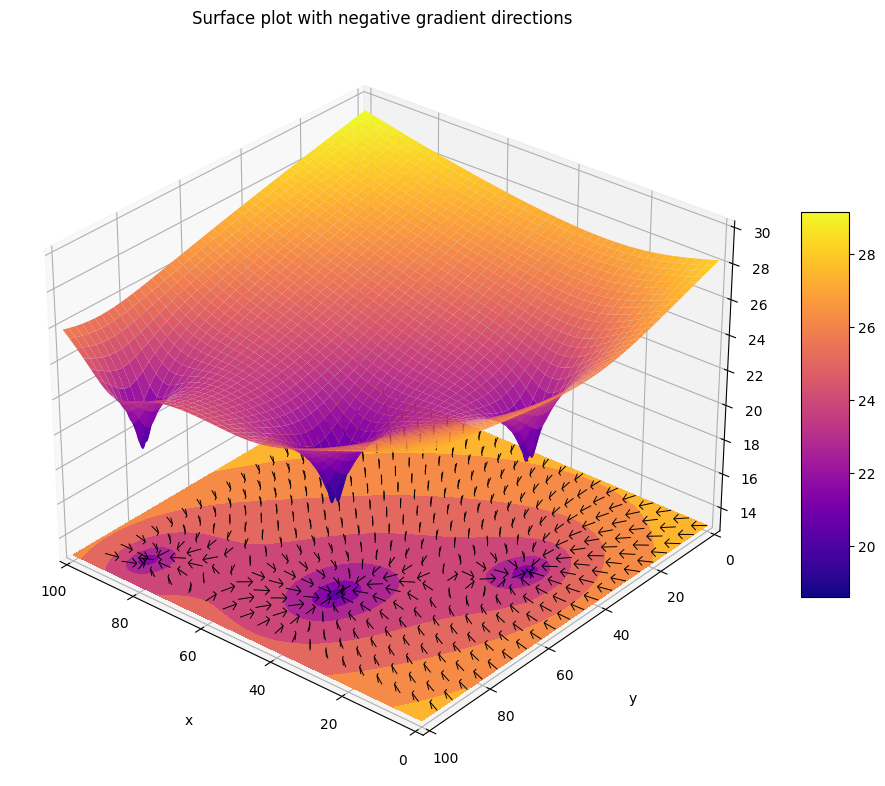

In [188]:

### Gradient calculations over grid
X = np.arange(0, 100, 5)
Y = X
W = np.arange(0, 100, 1)
Z = np.zeros((len(X), len(Y), len(W),2)) 

Xi, Yi, Wi = np.meshgrid(X,Y,W)

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        point = np.array([x, y])
        z = -calc_gradient(point, a, t, s)	      # We plot the negative gradients. This shows the steps towards the minimum. We find this the most intuitive.                              
        Z[i,j,13,:] = z

Z0 = np.zeros(Xi.shape)
Z1 = Z[:,:,:,0]
Z2 = Z[:,:,:,1]


### Set figure
ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')

space = np.linspace(0, 100, 1000)

### plot surface
X, Y = np.meshgrid(space, space)
Z = diff((X, Y), a, t, s)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.plasma)
plt.title('Surface plot with negative gradient directions')

### plot colorbar
fig.colorbar(surf, shrink=0.5, aspect=8)

### plot gradient errors
Q = ax.quiver3D( Yi, Xi, Wi, Z1, Z2, Z0, length = 3.5, arrow_length_ratio= 0.3, normalize= True, color = 'k',linewidth=0.7)
ax.contourf(X, Y, Z, zdir='z', offset = 13, cmap = plt.cm.plasma)
ax.axes.set_zlim3d(bottom=13, top=30)


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('diff', labelpad=20)

ax.view_init(30,130)

ax.margins(0,0,0)
plt.show()
